In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

### **Upload Files**
**This is just for Google Colab**

In [2]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving train-final.csv to train-final.csv
User uploaded file "train-final.csv" with length 1572896 bytes


### **Import the dataset**

In [3]:
# Import the dataset.
df = pd.read_csv(filepath_or_buffer="train-final.csv", header=None)
df

,0,1,2,3,4,5,6,7,8,9,...,232,233,234,235,236,237,238,239,240,241
0,-0.479730,0.726079,2.403713,-0.481913,0.540689,2.455865,-0.646274,0.406351,2.428461,-0.312905,...,0.730551,0.367526,0.520040,0.493564,0.485049,0.477886,0.607874,0.441320,bye,5
1,0.051888,0.646871,2.409750,0.060117,0.451912,2.449198,-0.106647,0.344324,2.461468,0.183852,...,0.428723,0.571661,0.431776,0.279627,0.595978,0.389501,0.241849,0.617291,you,30
2,-0.002692,0.624926,2.240212,0.018586,0.435987,2.269613,-0.152985,0.336314,2.305371,0.164105,...,0.537268,0.488480,0.540547,0.542650,0.430114,0.542999,0.454954,0.479623,thankyou,26
3,-0.029336,0.664426,2.443440,-0.023426,0.480809,2.451577,-0.203417,0.353489,2.506273,0.119183,...,0.713397,0.387092,0.439498,0.417769,0.554555,0.498407,0.565789,0.455313,name,20
4,0.065604,0.639172,2.377587,0.069247,0.447377,2.405972,-0.092707,0.339007,2.368022,0.231172,...,0.671461,0.475014,0.401192,0.372539,0.578720,0.446630,0.580236,0.460550,love,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535,-0.153429,0.653027,2.290336,-0.202696,0.460290,2.337915,-0.285067,0.331688,2.247679,-0.060992,...,0.485318,0.522038,0.435164,0.464692,0.536148,0.538248,0.338490,0.536627,go,15
536,-0.270779,0.692372,2.418405,-0.309432,0.513018,2.427828,-0.367138,0.339803,2.340697,-0.174124,...,0.787530,0.375785,0.490460,0.512968,0.463116,0.507656,0.280617,0.563687,home,17
537,-0.293375,0.679736,2.413071,-0.332449,0.499503,2.442463,-0.395068,0.346635,2.347341,-0.197936,...,0.575436,0.505751,0.331261,0.389225,0.598488,0.617464,0.316425,0.504178,rain,22
538,-0.497183,0.534425,2.322565,-0.557379,0.353817,2.343797,-0.614599,0.217394,2.218595,-0.435612,...,0.759135,0.345677,0.341312,0.408758,0.589787,0.561659,0.399114,0.504443,my,19


### **Lines which contain at least one NaN**

In [4]:
null_data = df[df.isnull().any(axis=1)]
null_data

,0,1,2,3,4,5,6,7,8,9,...,232,233,234,235,236,237,238,239,240,241
12,0.204183,0.618758,2.225108,0.226000,0.425835,2.265266,0.050820,NaN,NaN,NaN,...,0.601167,0.456672,0.520299,0.363878,0.534609,0.651381,0.516603,0.380611,baby,2
13,-0.148463,0.695068,2.387382,-0.172162,0.515340,2.448530,-0.290227,NaN,NaN,NaN,...,0.664266,0.439393,0.298087,0.459331,0.566469,0.435936,0.291789,0.580736,strong,24
14,0.172270,0.658868,2.448492,0.187001,0.463204,2.469962,0.015557,NaN,NaN,NaN,...,0.505789,0.553784,0.434283,0.429866,0.551489,0.670073,0.431406,0.414681,big,3
15,-0.366370,0.556833,2.435018,-0.377683,0.372727,2.472731,-0.542944,NaN,NaN,NaN,...,0.619969,0.480178,0.333590,0.442752,0.568731,0.577443,0.485505,0.450070,cloud,8
498,-0.088352,0.705637,2.424139,-0.117957,0.514156,2.456000,-0.239139,0.379954,2.373748,0.059828,...,0.513313,0.464093,0.424794,0.462116,0.525969,0.533326,0.299953,0.550104,welcome,27
499,0.045153,0.604584,2.115132,0.001494,0.418616,2.143839,-0.098663,0.281203,2.059865,0.144997,...,0.560872,0.471681,0.590768,0.339112,0.512405,0.544810,0.479384,0.475448,name,20
500,-0.045756,0.704355,2.414313,-0.087926,0.514462,2.441580,-0.184449,0.373904,2.342377,0.057216,...,0.788191,0.336531,0.398955,0.472566,0.543860,0.425363,0.417401,0.560892,no,21


---
### **Pre-processing Function**
---

In [121]:
def pre_process(myframe: pd.core.frame.DataFrame , mystrategy: int):

  if mystrategy==1:
    # Drop all lines that contain at least 1 NaN value
    df2=myframe.dropna()

  elif mystrategy==2:
    # Drop all lines in which numerucal label is missing
    df2=df.dropna(subset=[df.columns[-1]])
    # Fill missing value with the mean of the column for all but last two columns
    df2.iloc[:,:-2]=df2.iloc[:,:-2].fillna(df2.iloc[:,:-2].mean())

  elif mystrategy==3:
    # find column indexes with at least one null value
    df2=myframe.copy()
    c = df2.columns[df2.isnull().any(axis=0)]
    for ci in c:
      df2[ci]=df2[ci].fillna(df2.groupby(240)[ci].transform('mean'))
    
  elif mystrategy==4:
    # find column indexes with at least one null value
    df2=myframe.copy()
    c = df2.columns[df2.isnull().any(axis=0)]
    for ci in c:
      df2[ci]=df2[ci].fillna(df2.groupby(240)[ci].transform('max'))

  elif mystrategy==5:
    # Drop all lines in which numerucal label is missing
    df2=df.dropna(subset=[df.columns[-1]])
    # Fill missing value with the mean of the column for all but last two columns
    df2.iloc[:,:-2]=df2.iloc[:,:-2].fillna(df2.iloc[:,:-2].max())      

  elif mystrategy==6:
    # Drop all lines in which numerucal label is missing
    df2=df.dropna(subset=[df.columns[-1]])
    # Fill missing value with the mean of the column for all but last two columns
    df2.iloc[:,:-2]=df2.iloc[:,:-2].fillna(df2.iloc[:,:-2].median())


  else:
    df2=myframe.copy()
  
  return df2

In [127]:
dfpp = pre_process(df,4)
dfpp

,0,1,2,3,4,5,6,7,8,9,...,232,233,234,235,236,237,238,239,240,241
0,-0.479730,0.726079,2.403713,-0.481913,0.540689,2.455865,-0.646274,0.406351,2.428461,-0.312905,...,0.730551,0.367526,0.520040,0.493564,0.485049,0.477886,0.607874,0.441320,bye,5
1,0.051888,0.646871,2.409750,0.060117,0.451912,2.449198,-0.106647,0.344324,2.461468,0.183852,...,0.428723,0.571661,0.431776,0.279627,0.595978,0.389501,0.241849,0.617291,you,30
2,-0.002692,0.624926,2.240212,0.018586,0.435987,2.269613,-0.152985,0.336314,2.305371,0.164105,...,0.537268,0.488480,0.540547,0.542650,0.430114,0.542999,0.454954,0.479623,thankyou,26
3,-0.029336,0.664426,2.443440,-0.023426,0.480809,2.451577,-0.203417,0.353489,2.506273,0.119183,...,0.713397,0.387092,0.439498,0.417769,0.554555,0.498407,0.565789,0.455313,name,20
4,0.065604,0.639172,2.377587,0.069247,0.447377,2.405972,-0.092707,0.339007,2.368022,0.231172,...,0.671461,0.475014,0.401192,0.372539,0.578720,0.446630,0.580236,0.460550,love,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535,-0.153429,0.653027,2.290336,-0.202696,0.460290,2.337915,-0.285067,0.331688,2.247679,-0.060992,...,0.485318,0.522038,0.435164,0.464692,0.536148,0.538248,0.338490,0.536627,go,15
536,-0.270779,0.692372,2.418405,-0.309432,0.513018,2.427828,-0.367138,0.339803,2.340697,-0.174124,...,0.787530,0.375785,0.490460,0.512968,0.463116,0.507656,0.280617,0.563687,home,17
537,-0.293375,0.679736,2.413071,-0.332449,0.499503,2.442463,-0.395068,0.346635,2.347341,-0.197936,...,0.575436,0.505751,0.331261,0.389225,0.598488,0.617464,0.316425,0.504178,rain,22
538,-0.497183,0.534425,2.322565,-0.557379,0.353817,2.343797,-0.614599,0.217394,2.218595,-0.435612,...,0.759135,0.345677,0.341312,0.408758,0.589787,0.561659,0.399114,0.504443,my,19


### **Visualize single gesture**

**links array is used to code-in the interconnection between the different joints of the body**

In [123]:
links = [[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
         [0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
         [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]]

**Defining a function to vizualize a single row in a 2-D graph (Z-dimennsion is depth)**

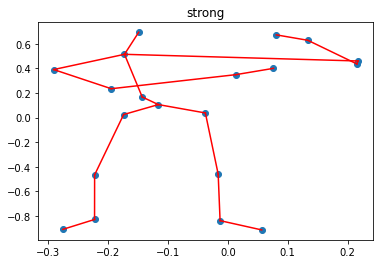

In [128]:
def viz_gesture(vizframe: pd.core.frame.DataFrame, points:int, row2viz: int,links: list ):
  g=vizframe.iloc[row2viz]
  xx=g[::3][0:int(points)].tolist()
  yy=g[1::3][0:int(points)].tolist()
  zz=g[2::3][0:int(points)].tolist()

  plt.scatter(xx,yy)

  for j1 in range(0, points):
    for j2 in range(0, points):
      if links[j1][j2]==1:
        plt.plot([xx[j1], xx[j2]], [yy[j1], yy[j2]], 'r-')

  plt.title(g[4*3*points])
  plt.show()
  return 0

# try function for row 6
viz_gesture(dfpp, 20, 13, links);

**Group rows of the preprocessed dataframe by label**

systematic mistake: not all columns should be groupped using 'mean', the standard deviation of mean != mean of standard deviations

In [95]:
dfppg = dfpp.groupby([240],as_index=False).mean()
dfppg = dfppg.reindex(columns=sorted(dfppg.columns))
dfppg

,0,1,2,3,4,5,6,7,8,9,...,232,233,234,235,236,237,238,239,240,241
0,-0.189418,0.629678,2.363186,-0.214646,0.449964,2.415260,-0.335180,0.316182,2.358115,-0.048218,...,0.631632,0.442274,0.423786,0.461262,0.522554,0.460983,0.433692,0.519381,afternoon,1.0
1,-0.124621,0.623111,2.294127,-0.151103,0.442230,2.347406,-0.272937,0.323340,2.294840,-0.032634,...,0.686558,0.415025,0.426404,0.448806,0.536183,0.455945,0.477326,0.503393,baby,2.0
2,-0.177416,0.657958,2.358481,-0.184381,0.472611,2.397781,-0.326530,0.355488,2.338278,-0.040145,...,0.650061,0.438211,0.457024,0.469165,0.508434,0.445608,0.429618,0.531382,big,3.0
3,-0.119399,0.655568,2.346259,-0.158347,0.469633,2.383430,-0.279237,0.355560,2.313982,-0.008623,...,0.592977,0.447178,0.443346,0.462873,0.520620,0.463467,0.434643,0.512317,born,4.0
4,-0.288056,0.642047,2.354826,-0.311778,0.456005,2.390655,-0.435556,0.325266,2.338754,-0.158651,...,0.654416,0.428625,0.495945,0.465003,0.489838,0.440165,0.444367,0.527250,bye,5.0
5,-0.288295,0.645941,2.355794,-0.294919,0.459721,2.397264,-0.415421,0.336948,2.333760,-0.132069,...,0.639234,0.445575,0.504640,0.491590,0.477742,0.447448,0.438106,0.525290,calendar,6.0
6,-0.208934,0.643904,2.319138,-0.224238,0.459005,2.368284,-0.358167,0.333507,2.330157,-0.071074,...,0.628843,0.438382,0.437449,0.457025,0.523980,0.453899,0.398383,0.543051,child,7.0
7,-0.228536,0.659784,2.385383,-0.249341,0.482259,2.413936,-0.369053,0.374718,2.343053,-0.082883,...,0.656090,0.424069,0.425327,0.497632,0.499363,0.511248,0.447989,0.493986,cloud,8.0
8,-0.082051,0.642264,2.299904,-0.097927,0.457180,2.344552,-0.230561,0.333228,2.303164,0.068428,...,0.539017,0.455739,0.441867,0.445823,0.524479,0.475279,0.392536,0.523777,come,9.0
9,-0.164432,0.653579,2.312531,-0.189395,0.467285,2.351398,-0.316926,0.335583,2.305672,-0.032812,...,0.587302,0.470419,0.482090,0.456962,0.480567,0.495316,0.406884,0.514683,daily,10.0


**Create function (process) to vizualize a gesture by label from the groupped dataframe**

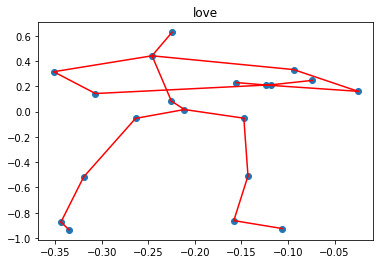

In [101]:
def viz_gesture_group(vizframe: pd.core.frame.DataFrame, points:int,links: list, gesture:str ):
  gg=vizframe[vizframe[240]==gesture]
  viz_gesture(gg, points, 0, links);


viz_gesture_group(dfppg,20,links,'love')